<a href="https://colab.research.google.com/github/Rogerio-mack/IMT_CD_2024/blob/main/IMT_HClust_Lab_solucao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="ITM">
</head>

<img src="https://maua.br/images/selo-60-anos-maua.svg" width=300, align="right">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->


<h1 align=left><font size = 6, style="color:rgb(200,0,0)">Lab Solução</font></h1>
<hr>

# **Clusterização Hierárquica**

# Recordando a Teoria

Reveja aqui o processo complete o Clusterização Hierárquica.

```
# Define os dados do modelo
X = df[...]

# Normalização e outras preparações dos dados
from sklearn.preprocessing import normalize
X = normalize(X)

# Avalia o número de agrupamentos desejado
from sklearn.cluster import AgglomerativeClustering

for n_clusters in range(2,8):
  clf = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')  
  clf.fit_predict(X)
  labels = clf.labels_
  print('Média do valor de Silhouette para ', n_clusters , ' clusters: ', metrics.silhouette_score(X, labels, metric='euclidean'))

# Faz a clusterização selecionada

## Declara o modelo
clf = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  

## 'Treina' o modelo
clf.fit(X)

# Resultados
labels = clf.labels_
print(labels)

# Associando os dados
df['cluster'] = labels
print(df.head())
```

# Caso: **Airbnb NYC 2019**

Neste data set você encontra dados do Airbnb de NYC de 2019. Explore os dados e em seguida faça uma clusterização dos imóveis com base nos atributos numérico e o tipo de apartamento (`room_type`).

https://meusite.mackenzie.br/rogerio/TIC/AB_NYC_2019_TIC.csv


# **IMPORTANTE** Para o questionário

Em sala empregaremos a versão reduzida do arquivo. Para responder o questionário empregue a versão estendida (sem o `_TIC` no final).

https://meusite.mackenzie.br/rogerio/TIC/AB_NYC_2019.csv

# Exercício. Acesse e Explore os dados

In [ ]:
# Seu Código

import pandas as pd
df = pd.read_csv('https://meusite.mackenzie.br/rogerio/TIC/AB_NYC_2019.csv')
df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
df.iloc[0]

id                                                              2539
name                              Clean & quiet apt home by the park
host_id                                                         2787
host_name                                                       John
neighbourhood_group                                         Brooklyn
neighbourhood                                             Kensington
latitude                                                    40.64749
longitude                                                  -73.97237
room_type                                               Private room
price                                                            149
minimum_nights                                                     1
number_of_reviews                                                  9
last_review                                               2018-10-19
reviews_per_month                                               0.21
calculated_host_listings_count    

# Exercício. Verifique a presença de Nulos

Verifique se existem dados nulos e, em caso positivos, opte por eliminar esses casos.

DICA: `isna()`, `dropna()`

In [ ]:
# Seu Código
df.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
df = df.dropna()

# Exercício. Faça o Hot Encode de `room_type`

Verifique os valores de `room_type` e faça o *Hot Encode* do atributos. Você pode querer mudar o nome dos atributos ao final. Para isso empregue o `rename`.

DICAS:
```
# Hot encode
dummies = pd.get_dummies(df.<atributo>,prefix='<prefix>')
df = pd.concat([df, dummies],axis=1)

# Rename Columns
df.rename(columns={'antes1':'depois1', 'antes2':'depois'},inplace=True)
```

In [ ]:
# Seu Código
df.room_type.value_counts()

Entire home/apt    20321
Private room       17654
Shared room          846
Name: room_type, dtype: int64

In [ ]:
dummies = pd.get_dummies(df.room_type,prefix='rtype_')
df = pd.concat([df, dummies],axis=1)
df.iloc[0]

id                                                              2539
name                              Clean & quiet apt home by the park
host_id                                                         2787
host_name                                                       John
neighbourhood_group                                         Brooklyn
neighbourhood                                             Kensington
latitude                                                    40.64749
longitude                                                  -73.97237
room_type                                               Private room
price                                                            149
minimum_nights                                                     1
number_of_reviews                                                  9
last_review                                               2018-10-19
reviews_per_month                                               0.21
calculated_host_listings_count    

In [ ]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'rtype__Entire home/apt', 'rtype__Private room',
       'rtype__Shared room'],
      dtype='object')

In [ ]:
df.rename(columns={'rtype__Entire home/apt':'rtype_entire', 'rtype__Private room':'rtype_private',
       'rtype__Shared room':'rtype_shared'},inplace=True)

# Exercício. Defina a entrada `X`

Defina a entrada `X` somente com os atributos de interesse (valores numéricos e o *hot encode* de `room_type`).

In [ ]:
# Seu Código
X = df[['latitude', 'longitude','price',
       'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'rtype_entire', 'rtype_private', 'rtype_shared']]

# Exercício. Normalize os dados

Vamos empregar o `normalize`.

In [ ]:
# Seu Código
from sklearn import preprocessing
X = preprocessing.normalize(X)


# Exercício. Selecione o número de Clusters

Empregue a Clusterização Hierárquica Aglomerativa, com distência Euclidiana e `linkage='ward'`. Você vai então verificar a métrica `Siclhouette`.




In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics

# Seu Código

for n_clusters in range(2,8):
  cluster = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='ward')
  cluster.fit_predict(X)
  labels = cluster.labels_
  print('Média do valor de Silhouette para ', n_clusters , ' clusters: ', metrics.silhouette_score(X, labels, metric='euclidean'))

Média do valor de Silhouette para  2  clusters:  0.4842926012398235
Média do valor de Silhouette para  3  clusters:  0.38007621225633575
Média do valor de Silhouette para  4  clusters:  0.3841620518554151
Média do valor de Silhouette para  5  clusters:  0.33744373159720226
Média do valor de Silhouette para  6  clusters:  0.28228498514492845
Média do valor de Silhouette para  7  clusters:  0.3031887757188181


# Exercício. Clusterize os dados para o número de Clusters Selecionado

Exiba os rótulos (labels) gerados. Adicione então os labels ao dataframe original em uma nova coluna `cluster`.

In [ ]:
from sklearn.cluster import AgglomerativeClustering

clf = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')

clf.fit(X)

# Resultados
labels = clf.labels_
print(labels[0:10])



[1 1 1 0 0 0 1 0 1 0]


In [ ]:
df['cluster'] = labels
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,rtype_entire,rtype_private,rtype_shared,cluster
0,20913,Charming 1 bed GR8 WBurg LOCATION!,79402,Christiana,Brooklyn,Williamsburg,40.70984,-73.95775,Entire home/apt,100,5,168,2018-07-22,1.57,1,0,1,0,0,0
1,25235,Large 2 Bedroom Great for Groups!,87773,Shelly,Brooklyn,Bedford-Stuyvesant,40.68373,-73.92377,Entire home/apt,125,90,162,2019-06-28,1.46,2,137,1,0,0,0
2,76761,Eveland the Place to Stay & Enjoy a 5-⭐️ 2bdrm,118971,Evelyn,Brooklyn,South Slope,40.66552,-73.99019,Entire home/apt,169,2,398,2019-06-28,3.97,3,182,1,0,0,0
3,135465,Garden apartment close to Manhattan,663879,Christopher,Brooklyn,Fort Greene,40.68626,-73.97598,Entire home/apt,170,3,86,2019-06-20,0.91,2,286,1,0,0,1
4,169002,Modern Space in Charming Pre-war,805344,Alec,Manhattan,Harlem,40.82411,-73.94934,Private room,65,2,41,2019-06-16,0.43,2,59,0,1,0,1


# Exercício. Exiba o Dendograma (**RESOLVIDO**)

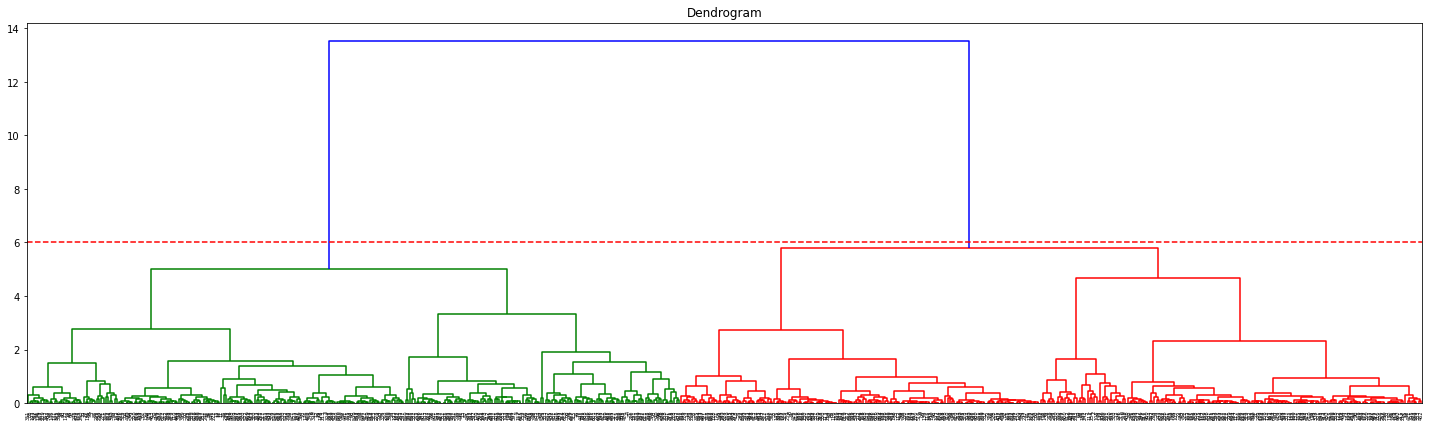

In [ ]:
# Seu código
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

plt.figure(figsize=(25, 7))
plt.title("Dendrogram")
plt.xticks(rotation=90)

dendrogram = shc.dendrogram(shc.linkage(X, method='ward'))
plt.axhline(y=6, color='r', linestyle='--')

plt.show()


# Exercício. Caracterizando os grupos (**RESOLVIDO**)

Verificando os valores médios de cada grupo.

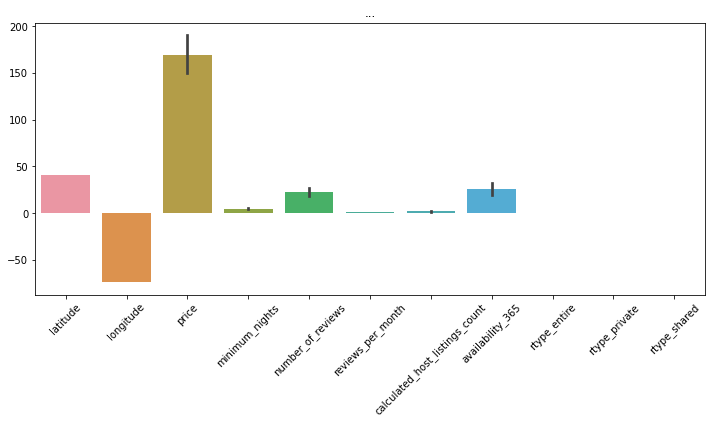

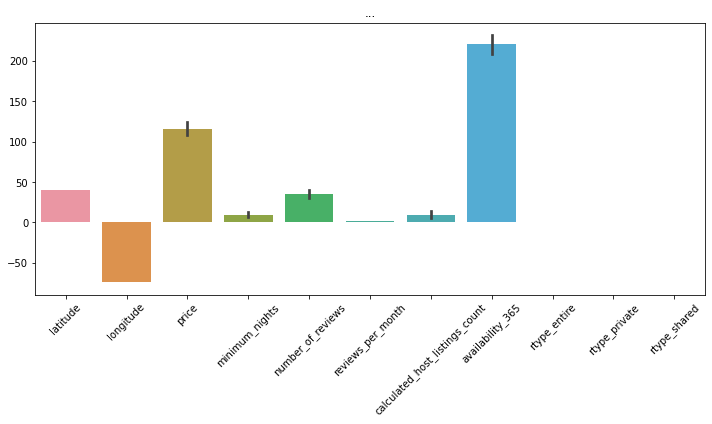

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

g = df[['latitude', 'longitude','price',
       'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'rtype_entire', 'rtype_private', 'rtype_shared',
        'cluster']]

f = plt.figure(figsize=(12,5))
sns.barplot(data=g[g.cluster==0].drop(columns='cluster'))
plt.xticks(rotation=45)
plt.title('...')
plt.show()

f = plt.figure(figsize=(12,5))
sns.barplot(data=g[g.cluster==1].drop(columns='cluster'))
plt.xticks(rotation=45)
plt.title('...')
plt.show()